In [1]:
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import dask.array as da
import dask.bag as db
import skimage
import pandas as pd
import anndata as ad

In [3]:
img = skimage.io.imread('/gpfs/commons/home/jsingh/outputs/masks_final.tiff')

In [4]:
def return_anndata(path):
    
    img = skimage.io.imread(path)
    ski_img = skimage.measure.regionprops(img)
    df = pd.DataFrame(ski_img)
    var_array = df.head(1).values
    list_var = list(var_array.flatten())
    labels = len(ski_img)
    df = pd.DataFrame(index = list_var, columns = np.arange(1,labels,1))

    
    for ind in df.index:
        for val in df.columns:
            df.loc[ind,val] = getattr(ski_img[val],ind)
            
    for val in df.columns:
        df.loc['bbox',val] = np.asarray(df.loc['bbox',val]).reshape(1,4)
        
        
    for val in df.columns:
        df.loc['centroid',val] = np.asarray(df.loc['centroid',val]).reshape(1,2)
        
        
    for ind in df.index:
        for val in df.columns:
            if type(df.loc[ind,val]) == np.ndarray:
                df.loc[ind,val] = df.loc[ind,val][~np.isnan(df.loc[ind,val])].flatten()
                
                
                
    scalar_list = ['area','area_bbox','area_convex','area_filled','axis_major_length','axis_minor_length',
            'eccentricity', 'equivalent_diameter_area','euler_number','extent','feret_diameter_max',
              'label','orientation','perimeter','perimeter_crofton','solidity'] 
    scalar_df = df.loc[['area','area_bbox','area_convex','area_filled','axis_major_length','axis_minor_length',
            'eccentricity', 'equivalent_diameter_area','euler_number','extent','feret_diameter_max',
              'label','orientation','perimeter','perimeter_crofton','solidity']]
                   
    multidim_list = ['bbox','centroid','centroid_local', 'coords', 'image', 'image_convex', 'image_filled',
                'inertia_tensor', 'inertia_tensor_eigvals', 'moments', 'moments_central' ,'moments_hu',
                'moments_normalized']
    multidim_df = df.loc[['bbox','centroid','centroid_local', 'coords', 'image', 'image_convex', 'image_filled',
                'inertia_tensor', 'inertia_tensor_eigvals', 'moments', 'moments_central' ,'moments_hu',
                'moments_normalized']]
    
    

    mt = multidim_df.transpose()
    
    X = scalar_df.T.values
    adata = ad.AnnData(X)
    adata.var_names = scalar_df.index
    adata.obs_names = scalar_df.columns
    adata.var = pd.DataFrame(index = scalar_list, columns = scalar_list)
    adata.obs = pd.DataFrame(index = scalar_df.columns, columns = scalar_df.columns)
    for col in mt.columns:
        adata.obsm[col] = mt[col].values
        
    i = 0
    for row in multidim_list:
        adata.uns[row] = multidim_df.iloc[[i]].values.flatten()
        i = i+1
        
    return adata
    

In [8]:
import pandas as pd
import anndata as ad
ad_object = return_anndata('outputs/masks_final.tiff')

/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:875: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")
/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:801: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [9]:
mat = ad_object.uns['centroid']

In [10]:
adata =  = 

In [11]:
x_coord = []
y_coord = []
for x in range(np.shape(adata.uns['centroid'])[0]):
    y_coord.append(adata.uns['centroid'][x][0])
    x_coord.append(adata.uns['centroid'][x][1])
    

In [12]:
from collections import namedtuple
Point = namedtuple('Point', ['x','y'])

In [13]:
point_list = []
for i,y in zip(x_coord,y_coord):
    point_list.append(Point(i,y))

In [16]:
v,l,e = computeVoronoiDiagram(point_list)

In [20]:
e

[(1, 0, 2),
 (5, 1, 3),
 (8, 3, 2),
 (3, 4, 1),
 (4, 5, 1),
 (11, 6, 4),
 (14, 5, 7),
 (12, 8, 5),
 (9, 9, 3),
 (15, 6, 10),
 (10, 4, 11),
 (6, 11, 8),
 (17, 14, 9),
 (27, 13, 15),
 (24, 15, 14),
 (32, 12, 16),
 (37, 16, 17),
 (16, 17, 6),
 (22, 18, 10),
 (36, 15, 19),
 (13, 7, 20),
 (34, 14, 21),
 (19, 22, 8),
 (28, 23, 12),
 (38, 17, 24),
 (23, 24, 18),
 (29, 25, 12),
 (51, 25, 26),
 (49, 23, 27),
 (52, 27, 25),
 (33, 13, 28),
 (35, 22, 29),
 (18, 29, 7),
 (46, 28, 30),
 (41, 30, 19),
 (43, 20, 31),
 (30, 31, 13),
 (45, 33, 21),
 (56, 32, 34),
 (66, 34, 33),
 (60, 29, 35),
 (31, 35, 20),
 (69, 35, 36),
 (53, 26, 37),
 (44, 38, 23),
 (47, 26, 39),
 (55, 37, 40),
 (76, 40, 39),
 (25, 41, 16),
 (73, 41, 38),
 (75, 39, 42),
 (50, 24, 42),
 (77, 43, 40),
 (72, 44, 37),
 (63, 44, 43),
 (81, 42, 45),
 (80, 46, 41),
 (42, 19, 47),
 (57, 47, 32),
 (70, 36, 48),
 (74, 38, 49),
 (26, 11, 50),
 (21, 10, 51),
 (78, 51, 50),
 (71, 52, 36),
 (86, 49, 53),
 (54, 53, 27),
 (79, 52, 54),
 (89, 54, 48)

In [51]:
###Build Graph
import networkx as nx
gr = nx.Graph()

In [66]:
for pt in v[:200]:
    gr.add_node(pt)

In [67]:
edge_list= []
for ei in range(len(e[:200])):
    edge_list.append(e[ei][1:])
    

In [68]:
for ed in edge_list:
    gr.add_edge(ed[0],ed[1])

In [69]:
gr.graph

{}

In [77]:
xr = []
yr = []
for vr in v:
    xr.append(vr[0])
    yr.append(vr[1])

In [79]:
len(xr)

11240

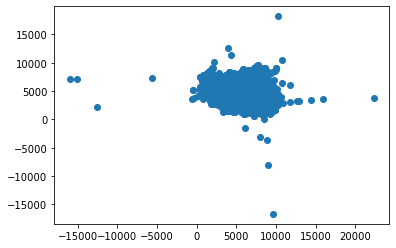

In [78]:
plt.scatter(xr, yr)

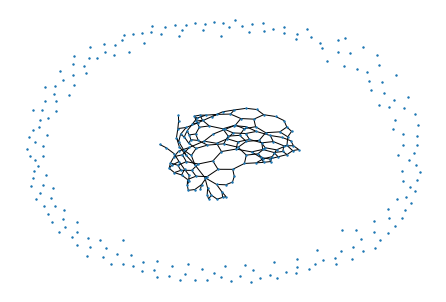

In [70]:
import matplotlib.pyplot as plt
nx.draw(gr,node_size= 2)

In [56]:
ed = edge_list[0]

In [59]:
ed[1]

2

In [69]:
gr.number_of_edges()

16866

In [58]:
adj = nx.adjacency_matrix(gr)

/tmp/ipykernel_155012/2548299641.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(gr)


In [59]:
adm = adj.toarray()

In [60]:
np.shape(adm)

(177, 177)

In [61]:
gr2 = nx.from_numpy_matrix(adm)

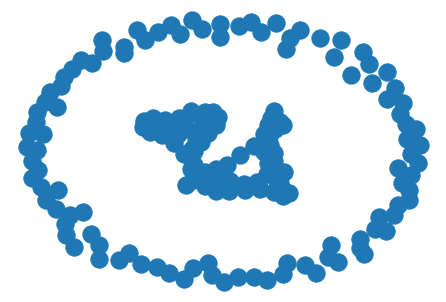

In [65]:
nx.draw(gr2)

In [15]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


# -*- coding: utf-8 -*

def usage():
    # fix_print_with_import
    print("""
voronoi - compute Voronoi diagram or Delaunay triangulation
voronoi [-t -p -d]  [filename]
Voronoi reads from filename (or standard input if no filename given) for a set
of points in the plane and writes either the Voronoi diagram or the Delaunay
triangulation to the standard output.  Each input line should consist of two
real numbers, separated by white space.
If option -t is present, the Delaunay triangulation is produced.
Each output line is a triple i j k, which are the indices of the three points
in a Delaunay triangle. Points are numbered starting at 0.
If option -t is not present, the Voronoi diagram is produced.
There are four output record types.
s a b      indicates that an input point at coordinates a b was seen.
l a b c    indicates a line with equation ax + by = c.
v a b      indicates a vertex at a b.
e l v1 v2  indicates a Voronoi segment which is a subsegment of line number l
           with endpoints numbered v1 and v2.  If v1 or v2 is -1, the line
           extends to infinity.
Other options include:
d    Print debugging info
p    Produce output suitable for input to plot (1), rather than the forms
     described above.
On unsorted data uniformly distributed in the unit square, voronoi uses about
20n+140 bytes of storage.
AUTHOR
Steve J. Fortune (1987) A Sweepline Algorithm for Voronoi Diagrams,
Algorithmica 2, 153-174.
""")


#############################################################################
#
# For programmatic use two functions are available:
#
#   computeVoronoiDiagram(points)
#
#        Takes a list of point objects (which must have x and y fields).
#        Returns a 3-tuple of:
#
#           (1) a list of 2-tuples, which are the x,y coordinates of the
#               Voronoi diagram vertices
#           (2) a list of 3-tuples (a,b,c) which are the equations of the
#               lines in the Voronoi diagram: a*x + b*y = c
#           (3) a list of 3-tuples, (l, v1, v2) representing edges of the
#               Voronoi diagram.  l is the index of the line, v1 and v2 are
#               the indices of the vetices at the end of the edge.  If
#               v1 or v2 is -1, the line extends to infinity.
#
#   computeDelaunayTriangulation(points):
#
#        Takes a list of point objects (which must have x and y fields).
#        Returns a list of 3-tuples: the indices of the points that form a
#        Delaunay triangle.
#
#############################################################################


import math
import sys
import getopt

TOLERANCE = 1e-9
BIG_FLOAT = 1e38


# ------------------------------------------------------------------

class Context(object):

    def __init__(self):
        self.doPrint = 0
        self.debug = 0
        self.plot = 0
        self.triangulate = False
        self.vertices = []  # list of vertex 2-tuples: (x,y)
        self.lines = []  # equation of line 3-tuple (a b c), for the equation of the line a*x+b*y = c
        self.edges = []  # edge 3-tuple: (line index, vertex 1 index, vertex 2 index)   if either vertex index is -1, the edge extends to infiinity
        self.triangles = []  # 3-tuple of vertex indices
        self.polygons = {}  # a dict of site:[edges] pairs

    def circle(self, x, y, rad):
        pass

    def clip_line(self, edge):
        pass

    def line(self, x0, y0, x1, y1):
        pass

    def outSite(self, s):
        if self.debug:
            # fix_print_with_import
            print("site (%d) at %f %f" % (s.sitenum, s.x, s.y))
        elif(self.triangulate):
            pass
        elif self.plot:
            self.circle(s.x, s.y, None)  # No radius?
        elif(self.doPrint):
            # fix_print_with_import
            print("s %f %f" % (s.x, s.y))

    def outVertex(self, s):
        self.vertices.append((s.x, s.y))
        if(self.debug):
            # fix_print_with_import
            print("vertex(%d) at %f %f" % (s.sitenum, s.x, s.y))
        elif(self.triangulate):
            pass
        elif(self.doPrint and not self.plot):
            # fix_print_with_import
            print("v %f %f" % (s.x, s.y))

    def outTriple(self, s1, s2, s3):
        self.triangles.append((s1.sitenum, s2.sitenum, s3.sitenum))
        if(self.debug):
            # fix_print_with_import
            print("circle through left=%d right=%d bottom=%d" % (s1.sitenum, s2.sitenum, s3.sitenum))
        elif(self.triangulate and self.doPrint and not self.plot):
            # fix_print_with_import
            print("%d %d %d" % (s1.sitenum, s2.sitenum, s3.sitenum))

    def outBisector(self, edge):
        self.lines.append((edge.a, edge.b, edge.c))
        if(self.debug):
            # fix_print_with_import
            print("line(%d) %gx+%gy=%g, bisecting %d %d" % (edge.edgenum, edge.a, edge.b, edge.c, edge.reg[0].sitenum, edge.reg[1].sitenum))
        elif(self.triangulate):
            if(self.plot):
                self.line(edge.reg[0].x, edge.reg[0].y, edge.reg[1].x, edge.reg[1].y)
        elif(self.doPrint and not self.plot):
            # fix_print_with_import
            print("l %f %f %f" % (edge.a, edge.b, edge.c))

    def outEdge(self, edge):
        sitenumL = -1
        if edge.ep[Edge.LE] is not None:
            sitenumL = edge.ep[Edge.LE].sitenum
        sitenumR = -1
        if edge.ep[Edge.RE] is not None:
            sitenumR = edge.ep[Edge.RE].sitenum
        if edge.reg[0].sitenum not in self.polygons:
            self.polygons[edge.reg[0].sitenum] = []
        if edge.reg[1].sitenum not in self.polygons:
            self.polygons[edge.reg[1].sitenum] = []
        self.polygons[edge.reg[0].sitenum].append((edge.edgenum, sitenumL, sitenumR))
        self.polygons[edge.reg[1].sitenum].append((edge.edgenum, sitenumL, sitenumR))
        self.edges.append((edge.edgenum, sitenumL, sitenumR))
        if(not self.triangulate):
            if self.plot:
                self.clip_line(edge)
            elif(self.doPrint):
                # fix_print_with_import
                print("e %d %d %d" % (edge.edgenum, sitenumL, sitenumR))

# ------------------------------------------------------------------


def voronoi(siteList, context):
    edgeList = EdgeList(siteList.xmin, siteList.xmax, len(siteList))
    priorityQ = PriorityQueue(siteList.ymin, siteList.ymax, len(siteList))
    siteIter = siteList.iterator()

    bottomsite = next(siteIter)
    context.outSite(bottomsite)
    newsite = next(siteIter)
    minpt = Site(-BIG_FLOAT, -BIG_FLOAT)
    while True:
        if not priorityQ.isEmpty():
            minpt = priorityQ.getMinPt()

        if (newsite and (priorityQ.isEmpty() or cmp(newsite, minpt) < 0)):
            # newsite is smallest -  this is a site event
            context.outSite(newsite)

            # get first Halfedge to the LEFT and RIGHT of the new site
            lbnd = edgeList.leftbnd(newsite)
            rbnd = lbnd.right

            # if this halfedge has no edge, bot = bottom site (whatever that is)
            # create a new edge that bisects
            bot = lbnd.rightreg(bottomsite)
            edge = Edge.bisect(bot, newsite)
            context.outBisector(edge)

            # create a new Halfedge, setting its pm field to 0 and insert
            # this new bisector edge between the left and right vectors in
            # a linked list
            bisector = Halfedge(edge, Edge.LE)
            edgeList.insert(lbnd, bisector)

            # if the new bisector intersects with the left edge, remove
            # the left edge's vertex, and put in the new one
            p = lbnd.intersect(bisector)
            if p is not None:
                priorityQ.delete(lbnd)
                priorityQ.insert(lbnd, p, newsite.distance(p))

            # create a new Halfedge, setting its pm field to 1
            # insert the new Halfedge to the right of the original bisector
            lbnd = bisector
            bisector = Halfedge(edge, Edge.RE)
            edgeList.insert(lbnd, bisector)

            # if this new bisector intersects with the right Halfedge
            p = bisector.intersect(rbnd)
            if p is not None:
                # push the Halfedge into the ordered linked list of vertices
                priorityQ.insert(bisector, p, newsite.distance(p))

            newsite = next(siteIter)

        elif not priorityQ.isEmpty():
            # intersection is smallest - this is a vector (circle) event

            # pop the Halfedge with the lowest vector off the ordered list of
            # vectors.  Get the Halfedge to the left and right of the above HE
            # and also the Halfedge to the right of the right HE
            lbnd = priorityQ.popMinHalfedge()
            llbnd = lbnd.left
            rbnd = lbnd.right
            rrbnd = rbnd.right

            # get the Site to the left of the left HE and to the right of
            # the right HE which it bisects
            bot = lbnd.leftreg(bottomsite)
            top = rbnd.rightreg(bottomsite)

            # output the triple of sites, stating that a circle goes through them
            mid = lbnd.rightreg(bottomsite)
            context.outTriple(bot, top, mid)

            # get the vertex that caused this event and set the vertex number
            # couldn't do this earlier since we didn't know when it would be processed
            v = lbnd.vertex
            siteList.setSiteNumber(v)
            context.outVertex(v)

            # set the endpoint of the left and right Halfedge to be this vector
            if lbnd.edge.setEndpoint(lbnd.pm, v):
                context.outEdge(lbnd.edge)

            if rbnd.edge.setEndpoint(rbnd.pm, v):
                context.outEdge(rbnd.edge)

            # delete the lowest HE, remove all vertex events to do with the
            # right HE and delete the right HE
            edgeList.delete(lbnd)
            priorityQ.delete(rbnd)
            edgeList.delete(rbnd)

            # if the site to the left of the event is higher than the Site
            # to the right of it, then swap them and set 'pm' to RIGHT
            pm = Edge.LE
            if bot.y > top.y:
                bot, top = top, bot
                pm = Edge.RE

            # Create an Edge (or line) that is between the two Sites.  This
            # creates the formula of the line, and assigns a line number to it
            edge = Edge.bisect(bot, top)
            context.outBisector(edge)

            # create a HE from the edge
            bisector = Halfedge(edge, pm)

            # insert the new bisector to the right of the left HE
            # set one endpoint to the new edge to be the vector point 'v'
            # If the site to the left of this bisector is higher than the right
            # Site, then this endpoint is put in position 0; otherwise in pos 1
            edgeList.insert(llbnd, bisector)
            if edge.setEndpoint(Edge.RE - pm, v):
                context.outEdge(edge)

            # if left HE and the new bisector don't intersect, then delete
            # the left HE, and reinsert it
            p = llbnd.intersect(bisector)
            if p is not None:
                priorityQ.delete(llbnd)
                priorityQ.insert(llbnd, p, bot.distance(p))

            # if right HE and the new bisector don't intersect, then reinsert it
            p = bisector.intersect(rrbnd)
            if p is not None:
                priorityQ.insert(bisector, p, bot.distance(p))
        else:
            break

    he = edgeList.leftend.right
    while he is not edgeList.rightend:
        context.outEdge(he.edge)
        he = he.right
    Edge.EDGE_NUM = 0


# ------------------------------------------------------------------


def isEqual(a, b, relativeError=TOLERANCE):
    # is nearly equal to within the allowed relative error
    norm = max(abs(a), abs(b))
    return (norm < relativeError) or (abs(a - b) < (relativeError * norm))


# ------------------------------------------------------------------


class Site(object):

    def __init__(self, x=0.0, y=0.0, sitenum=0):
        self.x = x
        self.y = y
        self.sitenum = sitenum

    def dump(self):
        # fix_print_with_import
        print("Site #%d (%g, %g)" % (self.sitenum, self.x, self.y))

    def __eq__(self, other):
        return (self.x == other.x) and (self.y == other.y)

    def __lt__(self, other):
        if self.y < other.y:
            return True
        elif self.y > other.y:
            return False
        elif self.x < other.x:
            return True
        else:
            return False

    def distance(self, other):
        dx = self.x - other.x
        dy = self.y - other.y
        return math.sqrt(dx * dx + dy * dy)


# ------------------------------------------------------------------


class Edge(object):
    LE = 0
    RE = 1
    EDGE_NUM = 0
    DELETED = {}  # marker value

    def __init__(self):
        self.a = 0.0
        self.b = 0.0
        self.c = 0.0
        self.ep = [None, None]
        self.reg = [None, None]
        self.edgenum = 0

    def dump(self):
        # fix_print_with_import
        print("(#%d a=%g, b=%g, c=%g)" % (self.edgenum, self.a, self.b, self.c))
        # fix_print_with_import
        print("ep", self.ep)
        # fix_print_with_import
        print("reg", self.reg)

    def setEndpoint(self, lrFlag, site):
        self.ep[lrFlag] = site
        if self.ep[Edge.RE - lrFlag] is None:
            return False
        return True

    @staticmethod
    def bisect(s1, s2):
        newedge = Edge()
        newedge.reg[0] = s1  # store the sites that this edge is bisecting
        newedge.reg[1] = s2

        # to begin with, there are no endpoints on the bisector - it goes to infinity
        # ep[0] and ep[1] are None

        # get the difference in x dist between the sites
        dx = float(s2.x - s1.x)
        dy = float(s2.y - s1.y)
        adx = abs(dx)  # make sure that the difference in positive
        ady = abs(dy)

        # get the slope of the line
        newedge.c = float(s1.x * dx + s1.y * dy + (dx * dx + dy * dy) * 0.5)
        if adx > ady:
            # set formula of line, with x fixed to 1
            newedge.a = 1.0
            newedge.b = dy / dx
            newedge.c /= dx
        else:
            # set formula of line, with y fixed to 1
            newedge.b = 1.0
            newedge.a = dx / dy
            newedge.c /= dy

        newedge.edgenum = Edge.EDGE_NUM
        Edge.EDGE_NUM += 1
        return newedge


# ------------------------------------------------------------------
class Halfedge(object):

    def __init__(self, edge=None, pm=Edge.LE):
        self.left = None  # left Halfedge in the edge list
        self.right = None  # right Halfedge in the edge list
        self.qnext = None  # priority queue linked list pointer
        self.edge = edge  # edge list Edge
        self.pm = pm
        self.vertex = None  # Site()
        self.ystar = BIG_FLOAT

    def dump(self):
        # fix_print_with_import
        print("Halfedge--------------------------")
        # fix_print_with_import
        print("left: ", self.left)
        # fix_print_with_import
        print("right: ", self.right)
        # fix_print_with_import
        print("edge: ", self.edge)
        # fix_print_with_import
        print("pm: ", self.pm)
        # fix_print_with_import
        print("vertex:")
        if self.vertex:
            self.vertex.dump()
        else:
            # fix_print_with_import
            print("None")
        # fix_print_with_import
        print("ystar: ", self.ystar)

    def __eq__(self, other):
        return (self.vertex.x == other.vertex.x) and (self.ystar == other.ystar)

    def __lt__(self, other):
        if self.ystar < other.ystar:
            return True
        elif self.ystar > other.ystar:
            return False
        elif self.vertex.x < other.vertex.x:
            return True
        else:
            return False

    def leftreg(self, default):
        if not self.edge:
            return default
        elif self.pm == Edge.LE:
            return self.edge.reg[Edge.LE]
        else:
            return self.edge.reg[Edge.RE]

    def rightreg(self, default):
        if not self.edge:
            return default
        elif self.pm == Edge.LE:
            return self.edge.reg[Edge.RE]
        else:
            return self.edge.reg[Edge.LE]

    # returns True if p is to right of halfedge self
    def isPointRightOf(self, pt):
        e = self.edge
        topsite = e.reg[1]
        right_of_site = pt.x > topsite.x

        if (right_of_site and self.pm == Edge.LE):
            return True

        if (not right_of_site and self.pm == Edge.RE):
            return False

        if (e.a == 1.0):
            dyp = pt.y - topsite.y
            dxp = pt.x - topsite.x
            fast = 0
            if ((not right_of_site and e.b < 0.0) or (right_of_site and e.b >= 0.0)):
                above = dyp >= e.b * dxp
                fast = above
            else:
                above = pt.x + pt.y * e.b > e.c
                if (e.b < 0.0):
                    above = not above
                if (not above):
                    fast = 1
            if (not fast):
                dxs = topsite.x - (e.reg[0]).x
                above = e.b * (dxp * dxp - dyp * dyp) < dxs * dyp * (1.0 + 2.0 * dxp / dxs + e.b * e.b)
                if (e.b < 0.0):
                    above = not above
        else:  # e.b == 1.0
            yl = e.c - e.a * pt.x
            t1 = pt.y - yl
            t2 = pt.x - topsite.x
            t3 = yl - topsite.y
            above = t1 * t1 > t2 * t2 + t3 * t3

        if (self.pm == Edge.LE):
            return above
        else:
            return not above

    # --------------------------
    # create a new site where the Halfedges el1 and el2 intersect
    def intersect(self, other):
        e1 = self.edge
        e2 = other.edge
        if (e1 is None) or (e2 is None):
            return None

        # if the two edges bisect the same parent return None
        if e1.reg[1] is e2.reg[1]:
            return None

        d = e1.a * e2.b - e1.b * e2.a
        if isEqual(d, 0.0):
            return None

        xint = (e1.c * e2.b - e2.c * e1.b) / d
        yint = (e2.c * e1.a - e1.c * e2.a) / d
        if (cmp(e1.reg[1], e2.reg[1]) < 0):
            he = self
            e = e1
        else:
            he = other
            e = e2

        rightOfSite = xint >= e.reg[1].x
        if ((rightOfSite and he.pm == Edge.LE)
                or (not rightOfSite and he.pm == Edge.RE)):
            return None

        # create a new site at the point of intersection - this is a new
        # vector event waiting to happen
        return Site(xint, yint)


# ------------------------------------------------------------------
class EdgeList(object):

    def __init__(self, xmin, xmax, nsites):
        if xmin > xmax:
            xmin, xmax = xmax, xmin
        self.hashsize = int(2 * math.sqrt(nsites + 4))

        self.xmin = xmin
        self.deltax = float(xmax - xmin)
        self.hash = [None] * self.hashsize

        self.leftend = Halfedge()
        self.rightend = Halfedge()
        self.leftend.right = self.rightend
        self.rightend.left = self.leftend
        self.hash[0] = self.leftend
        self.hash[-1] = self.rightend

    def insert(self, left, he):
        he.left = left
        he.right = left.right
        left.right.left = he
        left.right = he

    def delete(self, he):
        he.left.right = he.right
        he.right.left = he.left
        he.edge = Edge.DELETED

    # Get entry from hash table, pruning any deleted nodes
    def gethash(self, b):
        if (b < 0 or b >= self.hashsize):
            return None
        he = self.hash[b]
        if he is None or he.edge is not Edge.DELETED:
            return he

        #  Hash table points to deleted half edge.  Patch as necessary.
        self.hash[b] = None
        return None

    def leftbnd(self, pt):
        # Use hash table to get close to desired halfedge
        bucket = int(((pt.x - self.xmin) / self.deltax * self.hashsize))

        if (bucket < 0):
            bucket = 0

        if (bucket >= self.hashsize):
            bucket = self.hashsize - 1

        he = self.gethash(bucket)
        if (he is None):
            i = 1
            while True:
                he = self.gethash(bucket - i)
                if (he is not None):
                    break
                he = self.gethash(bucket + i)
                if (he is not None):
                    break
                i += 1

        # Now search linear list of halfedges for the correct one
        if (he is self.leftend) or (he is not self.rightend and he.isPointRightOf(pt)):
            he = he.right
            while he is not self.rightend and he.isPointRightOf(pt):
                he = he.right
            he = he.left
        else:
            he = he.left
            while (he is not self.leftend and not he.isPointRightOf(pt)):
                he = he.left

        # Update hash table and reference counts
        if (bucket > 0 and bucket < self.hashsize - 1):
            self.hash[bucket] = he
        return he


# ------------------------------------------------------------------
class PriorityQueue(object):

    def __init__(self, ymin, ymax, nsites):
        self.ymin = ymin
        self.deltay = ymax - ymin
        self.hashsize = int(4 * math.sqrt(nsites))
        self.count = 0
        self.minidx = 0
        self.hash = []
        for i in range(self.hashsize):
            self.hash.append(Halfedge())

    def __len__(self):
        return self.count

    def isEmpty(self):
        return self.count == 0

    def insert(self, he, site, offset):
        he.vertex = site
        he.ystar = site.y + offset
        last = self.hash[self.getBucket(he)]
        next = last.qnext
        while ((next is not None) and cmp(he, next) > 0):
            last = next
            next = last.qnext
        he.qnext = last.qnext
        last.qnext = he
        self.count += 1

    def delete(self, he):
        if (he.vertex is not None):
            last = self.hash[self.getBucket(he)]
            while last.qnext is not he:
                last = last.qnext
            last.qnext = he.qnext
            self.count -= 1
            he.vertex = None

    def getBucket(self, he):
        bucket = int(((he.ystar - self.ymin) / self.deltay) * self.hashsize)
        if bucket < 0:
            bucket = 0
        if bucket >= self.hashsize:
            bucket = self.hashsize - 1
        if bucket < self.minidx:
            self.minidx = bucket
        return bucket

    def getMinPt(self):
        while (self.hash[self.minidx].qnext is None):
            self.minidx += 1
        he = self.hash[self.minidx].qnext
        x = he.vertex.x
        y = he.ystar
        return Site(x, y)

    def popMinHalfedge(self):
        curr = self.hash[self.minidx].qnext
        self.hash[self.minidx].qnext = curr.qnext
        self.count -= 1
        return curr


# ------------------------------------------------------------------
class SiteList(object):

    def __init__(self, pointList):
        self.__sites = []
        self.__sitenum = 0

        self.__xmin = pointList[0].x
        self.__ymin = pointList[0].y
        self.__xmax = pointList[0].x
        self.__ymax = pointList[0].y
        for i, pt in enumerate(pointList):
            self.__sites.append(Site(pt.x, pt.y, i))
            if pt.x < self.__xmin:
                self.__xmin = pt.x
            if pt.y < self.__ymin:
                self.__ymin = pt.y
            if pt.x > self.__xmax:
                self.__xmax = pt.x
            if pt.y > self.__ymax:
                self.__ymax = pt.y
        self.__sites.sort()

    def setSiteNumber(self, site):
        site.sitenum = self.__sitenum
        self.__sitenum += 1

    class Iterator(object):

        def __init__(this, lst):
            this.generator = (s for s in lst)

        def __iter__(this):
            return this

        def __next__(this):
            try:
                return next(this.generator)
            except StopIteration:
                return None

    def iterator(self):
        return SiteList.Iterator(self.__sites)

    def __iter__(self):
        return SiteList.Iterator(self.__sites)

    def __len__(self):
        return len(self.__sites)

    def _getxmin(self):
        return self.__xmin

    def _getymin(self):
        return self.__ymin

    def _getxmax(self):
        return self.__xmax

    def _getymax(self):
        return self.__ymax

    xmin = property(_getxmin)
    ymin = property(_getymin)
    xmax = property(_getxmax)
    ymax = property(_getymax)


# ------------------------------------------------------------------
def computeVoronoiDiagram(points):
    """ Takes a list of point objects (which must have x and y fields).
        Returns a 3-tuple of:
           (1) a list of 2-tuples, which are the x,y coordinates of the
               Voronoi diagram vertices
           (2) a list of 3-tuples (a,b,c) which are the equations of the
               lines in the Voronoi diagram: a*x + b*y = c
           (3) a list of 3-tuples, (l, v1, v2) representing edges of the
               Voronoi diagram.  l is the index of the line, v1 and v2 are
               the indices of the vetices at the end of the edge.  If
               v1 or v2 is -1, the line extends to infinity.
    """
    siteList = SiteList(points)
    context = Context()
    voronoi(siteList, context)
    return (context.vertices, context.lines, context.edges)


# ------------------------------------------------------------------

def cmp(a, b):
    """Compare the two objects x and y and return an integer according to the
    outcome. The return value is negative if x < y, zero if x == y and strictly
    positive if x > y.
    In python 2 cmp() was a built in function but in python 3 is gone.
    """
    return (b < a) - (a < b)


In [19]:
nadjacency_matrix

[(1, 0, 2),
 (5, 1, 3),
 (8, 3, 2),
 (3, 4, 1),
 (4, 5, 1),
 (11, 6, 4),
 (14, 5, 7),
 (12, 8, 5),
 (9, 9, 3),
 (15, 6, 10),
 (10, 4, 11),
 (6, 11, 8),
 (17, 14, 9),
 (27, 13, 15),
 (24, 15, 14),
 (32, 12, 16),
 (37, 16, 17),
 (16, 17, 6),
 (22, 18, 10),
 (36, 15, 19),
 (13, 7, 20),
 (34, 14, 21),
 (19, 22, 8),
 (28, 23, 12),
 (38, 17, 24),
 (23, 24, 18),
 (29, 25, 12),
 (51, 25, 26),
 (49, 23, 27),
 (52, 27, 25),
 (33, 13, 28),
 (35, 22, 29),
 (18, 29, 7),
 (46, 28, 30),
 (41, 30, 19),
 (43, 20, 31),
 (30, 31, 13),
 (45, 33, 21),
 (56, 32, 34),
 (66, 34, 33),
 (60, 29, 35),
 (31, 35, 20),
 (69, 35, 36),
 (53, 26, 37),
 (44, 38, 23),
 (47, 26, 39),
 (55, 37, 40),
 (76, 40, 39),
 (25, 41, 16),
 (73, 41, 38),
 (75, 39, 42),
 (50, 24, 42),
 (77, 43, 40),
 (72, 44, 37),
 (63, 44, 43),
 (81, 42, 45),
 (80, 46, 41),
 (42, 19, 47),
 (57, 47, 32),
 (70, 36, 48),
 (74, 38, 49),
 (26, 11, 50),
 (21, 10, 51),
 (78, 51, 50),
 (71, 52, 36),
 (86, 49, 53),
 (54, 53, 27),
 (79, 52, 54),
 (89, 54, 48)